## Libraries

In [287]:
#!pip install jiwer

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
import os
import librosa
import librosa.display

# Prepare data.

In [2]:
wavs_path = 'data/audio_files/train_audios/'
metadata_path = 'data/train.csv'

In [3]:
metadata_df = pd.read_csv(metadata_path)
metadata_df.head()

,audio_ID,path,sentence
0,audio_faa7312a,audio_faa7312a.mp3,huko kwa Wakiroba Mkoa wa Mara
1,audio_643a10c1,audio_643a10c1.mp3,Alingaa katika medani za kisiasa na uongozi nd...
2,audio_5b626e74,audio_5b626e74.mp3,Vitu saba ambavyo kila baba atakuwa.
3,audio_5972c5f3,audio_5972c5f3.mp3,inaonyesha mawaziri wapya ambao wamechukua naf...
4,audio_deebd5b0,audio_deebd5b0.mp3,ee hii pia inatumiwa na kiwanda cha


In [4]:
metadata_df.columns = ["audio_ID","path", "sentence"]
metadata_df = metadata_df[["audio_ID", "sentence"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head()

,audio_ID,sentence
0,audio_e958f59a,wakati wote unatakiwa kuwa mkweli katika maong...
1,audio_ce644e73,muziki huo alikiambia kipindi cha chagua tano ...
2,audio_cd6d2100,kuelekea huko bujumbura burundi tutakuwa kunak...
3,audio_f63c4c05,wataraji kuende na kibarua katika ligi ya mabi...
4,audio_92c7a58b,Kuamua kuondoka nyumbani na kuacha mali yake n...


In [307]:
metadata_df.shape

(19093, 2)

#### Data explore:

In [5]:
# Initialize lists to store information about the audio files
audio_lengths = []
sample_rates = []
frequencies = []

In [11]:
# Function to extract audio features
def extract_audio_features(file_path):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_path, sr=None)
        
        # Get the audio length in seconds
        audio_length = librosa.get_duration(y=audio, sr=sample_rate)
        
        # Calculate the dominant frequency using Fourier Transform
        fft = np.fft.fft(audio)
        frequency = np.argmax(np.abs(fft))
        
        return audio_length, sample_rate, frequency
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None, None, None

In [12]:
import os
# Iterate through all audio files in the directory
for filename in os.listdir(wavs_path):
    if filename.endswith('.mp3'):
        file_path = os.path.join(wavs_path, filename)
        audio_length, sample_rate, frequency = extract_audio_features(file_path)
        
        # Append information to lists
        if audio_length is not None:
            audio_lengths.append(audio_length)
        if sample_rate is not None:
            sample_rates.append(sample_rate)
        if frequency is not None:
            frequencies.append(frequency)


In [13]:
# Calculate and display statistics
num_audios = len(audio_lengths)
avg_audio_length = np.mean(audio_lengths)
max_audio_length = np.max(audio_lengths)
min_audio_length = np.min(audio_lengths)

avg_sample_rate = np.mean(sample_rates)
max_frequency = np.max(frequencies)
min_frequency = np.min(frequencies)

print(f"Number of audio files loaded: {num_audios}")
print(f"Average audio length: {avg_audio_length:.2f} seconds")
print(f"Maximum audio length: {max_audio_length:.2f} seconds")
print(f"Minimum audio length: {min_audio_length:.2f} seconds")

print(f"Average sample rate: {avg_sample_rate:.2f} Hz")
print(f"Maximum dominant frequency: {max_frequency} Hz")
print(f"Minimum dominant frequency: {min_frequency} Hz")

Number of audio files loaded: 19093
Average audio length: 5.40 seconds
Maximum audio length: 20.09 seconds
Minimum audio length: 1.26 seconds
Average sample rate: 32000.00 Hz
Maximum dominant frequency: 632949 Hz
Minimum dominant frequency: 0 Hz


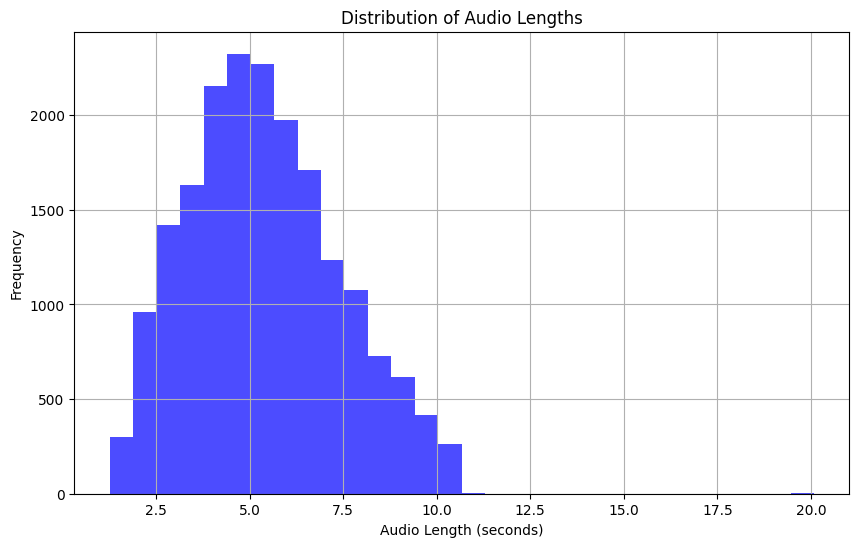

In [14]:
# Plot a histogram of audio lengths
plt.figure(figsize=(10, 6))
plt.hist(audio_lengths, bins=30, color='blue', alpha=0.7)
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Lengths')
plt.grid(True)
plt.show()

In [15]:
# Initialize lists to store information about the audio files
audio_data = []

# Function to extract audio features
def extract_audio_features(file_path):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_path, sr=None)
        
        # Get the audio length in seconds
        audio_length = librosa.get_duration(y=audio, sr=sample_rate)
        
        # Calculate the dominant frequency using Fourier Transform
        fft = abs(librosa.stft(audio))
        frequency = librosa.feature.spectral_centroid(S=fft).mean()
        
        return audio_length, frequency
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None, None

# Iterate through all audio files in the directory
for filename in os.listdir(wavs_path):
    if filename.endswith('.mp3'):
        file_path = os.path.join(wavs_path, filename)
        audio_length, frequency = extract_audio_features(file_path)
        
        # Append information to the list
        if audio_length is not None and frequency is not None:
            audio_data.append([filename, audio_length, frequency])

# Create a DataFrame
df = pd.DataFrame(audio_data, columns=['File Name', 'Audio Length (seconds)', 'Dominant Frequency'])

# print the DataFrame
print(df)


                File Name  Audio Length (seconds)  Dominant Frequency
0      audio_0001945d.mp3                   9.576         1426.060524
1      audio_0002ac69.mp3                   7.560         1246.220745
2      audio_00070400.mp3                   4.536         1074.869688
3      audio_0009db0f.mp3                   7.056         1476.977876
4      audio_000dddec.mp3                   2.916         1335.745604
...                   ...                     ...                 ...
19088  audio_fff29979.mp3                   7.704         1622.178135
19089  audio_fff306b8.mp3                   7.668         1077.812153
19090  audio_fff8e690.mp3                   8.640         1402.524821
19091  audio_fffc8a20.mp3                   7.956         1231.751479
19092  audio_ffffeeb1.mp3                   2.988         1508.134797

[19093 rows x 3 columns]


In [16]:
df.head()

,File Name,Audio Length (seconds),Dominant Frequency
0,audio_0001945d.mp3,9.576,1426.060524
1,audio_0002ac69.mp3,7.560,1246.220745
2,audio_00070400.mp3,4.536,1074.869688
3,audio_0009db0f.mp3,7.056,1476.977876
4,audio_000dddec.mp3,2.916,1335.745604


In [17]:
df.nunique()

File Name                 19093
Audio Length (seconds)      256
Dominant Frequency        19093
dtype: int64

### Split Data.

In [308]:
metadata_df.head(300).to_csv('data/notebook - 1.csv', index=False)

In [309]:
metadata_df = pd.read_csv('data/notebook - 1.csv')


In [310]:
# splitting into training and validation data.

split = int(len(metadata_df) * 0.8 )
split2 = int(len(metadata_df) * 0.2 )
train_df = metadata_df[:split]
df_val = metadata_df[split:]

print(f"Size of training set: {len(train_df)}")
print(f"Size of validation set: {len(df_val)}")

Size of training set: 240
Size of validation set: 60


In [311]:
train_df.head()

,audio_ID,sentence
0,audio_d43074e0,zao za Dar es Salaam na Nairobi mwaka elfumoja...
1,audio_2382f7f1,Wuasinkishu Siria Laitayiok Loitai Kisonko Mat...
2,audio_f99426d9,miti mingi hudondosha majani yake na maua hutokea
3,audio_dc0c00a3,Iwe dawa ya kosa langu
4,audio_409014fd,Wawakilishi wa makoloni yote kumi na tatu waka...


In [312]:
df_val.head()

,audio_ID,sentence
240,audio_0706d283,chembe za umeme katika shughuli tofauti za viw...
241,audio_9ba8ab32,inayotumika kuwaondoa viongozi madarakani
242,audio_fb63e65a,kakar anadokeza kuwa ufafanuzi wa kimataifa wa...
243,audio_c1784e96,ni shabaha kwa maendeleo ya Gold Coast Lakini ...
244,audio_28d6ea43,na kwa umri wangu na kwa uzoefu wangu wa mji huu


## PREPROCESSING:

In [313]:
# The set of characters accepted in the sentence
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]

# mapping characters to integers.
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token='')
# Mapping integers back to original characters.
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is : {char_to_num.get_vocabulary()}"
    f"(size is : {char_to_num.vocabulary_size()})"
)

The vocabulary is : ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' '](size is : 31)


In [314]:
char_to_num

In [315]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor , The size of the FFT to apply.
# If not provided , uses the smallest power of 2 enclosing frame lenght.
fft_length = 384

def encode_single_sample(wav_file, label):
    ## Process the audio.
    file = tf.io.read_file(wavs_path + wav_file + ".wav")

    ## Decode the audio file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    ## Change type to float.
    audio = tf.cast(audio, tf.float32)
    ## Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )

    ## We only need the magnitude which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)

    ## normalization.
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)

    ## Process the label
    ## Convert the label to lower case.
    label = tf.strings.lower(label)
    ## split the label
    label = tf.strings.unicode_split(label, input_encoding='UTF-8')
    ## Map the characters in label to numbers.
    label = char_to_num(label)
    # Return a dict as our model is expecting two inputs.
    return spectrogram, label


In [316]:
batch_size = 32
# Define the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(train_df["audio_ID"]), list(train_df["sentence"]))

)

train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset.
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["audio_ID"]), list(df_val["sentence"]))
)

validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [317]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss_value
    
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)

    return loss

In [318]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    
    ## Model similar to DeepSpeech2.
    input_spectrogram = layers.Input((None, input_dim), name="input")
    ## Expand the dimension to use 2D CNN
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)

    ## Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11,41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)

    ## Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1,2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers.
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN Layers.
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)

    # Dense layer.
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer.
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer.
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model

# Get the model.
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

## Training and evaluating.

In [319]:
# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0] * pred.shape[1])
    # Use_greedy search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    ## Iterate over the results and get back the text.
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode('utf-8')
        output_text.append(result)
    return output_text

## A callback class to output a few transcription during training.
class CallbackEval(keras.callbacks.Callback):
    ## Display a batch of outputs after every epoch.

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode('utf-8')
                )
                targets.append(label)

        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)

In [320]:
## Lets start training.
epochs = 2
## CallBack function to check sentence in validation set.
validation_callback = CallbackEval(validation_dataset)
## Train the model.
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],

    )

Epoch 1/2


NotFoundError: Graph execution error:

NewRandomAccessFile failed to Create/Open: audio_files/train_wavs/audio_d43074e0.wav : The system cannot find the file specified.
; No such file or directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_183882]

## Inferences

In [ ]:
## Let us check the results on the validation samples.
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
        print(f"Target    : {targets[i]}")
        print(f"Prediction: {predictions[i]}")
        print("-" * 100)